##
Today I am going to build my first Machine Learning algorithm of 15 Days Machine Learning Revision Series which is Linear Regresssion and Lasso Regression.
​
## What is Linear Regression?
Linear regression is a statistical method used to model the relationship between a dependent variable (output) and one or more independent variables (inputs) by fitting a linear equation to the observed data. In simpler terms, it helps us understand and predict how changes in one variable are associated with changes in another.
​
Let's use a simple example with a height and weight dataset. Suppose you have a dataset with information about people's heights (independent variable) and their corresponding weights (dependent variable). The goal is to create a linear regression model to understand the relationship between height and weight.
​
The linear regression equation takes the form:
- Weight= β0 + β1 × Height
Here:
- Weight is the dependent variable we want to predict.
- Height is the independent variable.
- β0 is the y-intercept, representing the weight when height is zero (which may not have practical meaning in this context).
- β1 is the slope, indicating how much weight changes for a one-unit change in height.
​
In the real world, data might not perfectly align on a straight line due to other factors, but linear regression tries to find the best-fitting line.
​
Example:
Suppose we have the following data:
​
\[
\begin{array}{|c|c|}
\hline
\text{Height (in inches)} & \text{Weight (in pounds)} \\
\hline
63 & 125 \\
65 & 140 \\
67 & 155 \\
70 & 175 \\
\hline
\end{array}
\]
​
Using linear regression, we find the equation:
Weight=100 + 5×Height
​
Here:
- β0 is 100 (the weight when height is zero, which doesn't make sense in this context).
- β1 is 5, meaning for each additional inch in height, the weight increases by 5 pounds.
​
So, if someone is 65 inches tall, we can predict their weight using the equation:
Weight=100 + 5 × 65
​
Linear regression helps us make predictions based on the observed relationship between variables.
​
## What is Lasso Regression?
Lasso Regression, short for Least Absolute Shrinkage and Selection Operator Regression, is a type of linear regression that includes a regularization term in the model. Regularization is a technique used to prevent overfitting by adding a penalty term to the linear regression equation, discouraging overly complex models with large coefficients. Lasso Regression specifically uses the L1 regularization, which adds the absolute values of the coefficients to the loss function.
​
The objective function for Lasso Regression can be represented as:
​
Objective Function=
Least Squares Loss + λ × ∑∣βi∣, where i=(1 to N)
​
Here:
- Least Squares Loss represents the traditional linear regression loss (sum of squared differences between predicted and actual values).
- λ is the regularization parameter, controlling the strength of the regularization. A higher λ leads to more regularization.
​
The term ∑∣βi∣ is the L1 norm of the coefficient vector β, and it is added to the loss function. The L1 norm is the sum of the absolute values of the coefficients.
​
The key characteristic of Lasso Regression is that it tends to shrink some of the coefficients all the way to zero, effectively performing feature selection. In other words, it encourages sparsity in the model by eliminating irrelevant or less important features, which can be beneficial when dealing with datasets with many variables.
​
Lasso Regression is particularly useful when you suspect that many of the features in your dataset may not contribute significantly to the prediction. It helps create a simpler and more interpretable model by automatically selecting important features and setting others to zero.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

## Data Collection & Pre-Processing

In [ ]:
#Loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('car data.csv')

In [ ]:
#inspecting the first 5 rows of the Dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
#Checking the number of rows and columns
car_dataset.shape

(301, 9)

In [ ]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
car_dataset.isnull().sum() #checking the number of missing values

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


## Encoding the categorical data


In [ ]:
#encoding the 'Fuel_Type' column
car_dataset.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace = True)
#encoding the 'Seller_type' column
car_dataset.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace = True)
#encoding the 'Transmission' column
car_dataset.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace = True)

In [ ]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


## Spliting the data into training data and test data

In [ ]:
X = car_dataset.drop(['Car_Name', 'Selling_Price'], axis=1)
Y = car_dataset['Selling_Price']

In [ ]:
X.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [ ]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

## Splitting training and test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state = 2)

In [ ]:
print(X_train.shape, X_test.shape,Y_train.shape, Y_test.shape )

(270, 7) (31, 7) (270,) (31,)


## Model Training
1. Linear Regression

In [ ]:
#loading the LinearRegression Model
lin_reg_model = LinearRegression()

In [ ]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

## Model Evaluation

In [ ]:
# Prediction on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [ ]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error: ",error_score)

R squared error:  0.8799451660493711


## Visualise the actual prices and predicted prices

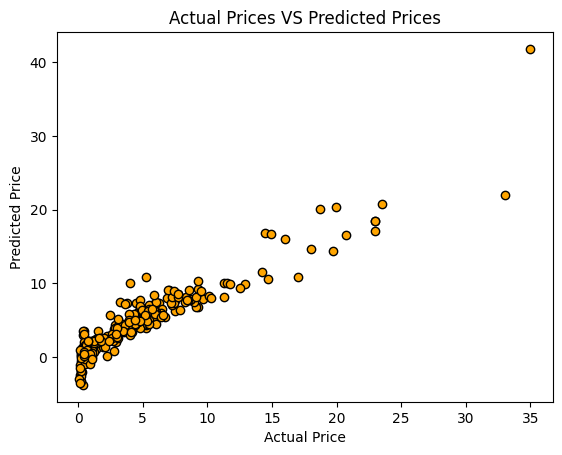

In [ ]:
plt.scatter(Y_train, training_data_prediction,edgecolors = 'black',color = 'orange')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices VS Predicted Prices")
plt.show()

In [ ]:
#prediction on test data
test_data_prediction= lin_reg_model.predict(X_test)

In [27]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error: ",error_score)

R squared error:  0.8365766715027051


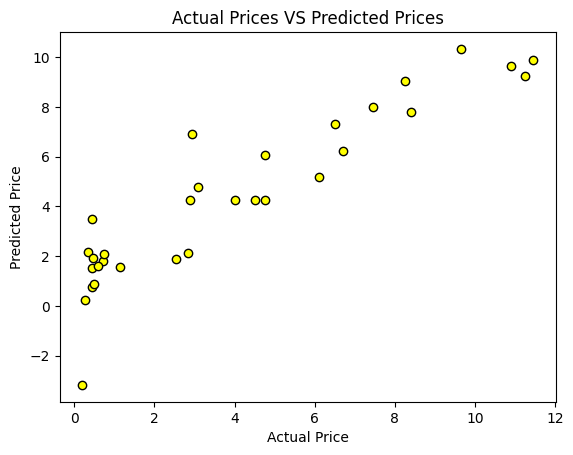

In [30]:
plt.scatter(Y_test, test_data_prediction,edgecolors = 'black',color = 'yellow')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices VS Predicted Prices")
plt.show()

2. Lasso Linear regression model

In [31]:
lasso_regression = Lasso()

In [32]:
lasso_regression.fit(X_train, Y_train)

Lasso()

## Model Evaluation

In [34]:
# Prediction on training data
training_data_prediction = lasso_regression.predict(X_train)

In [35]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error: ",error_score)

R squared error:  0.8427856123435794


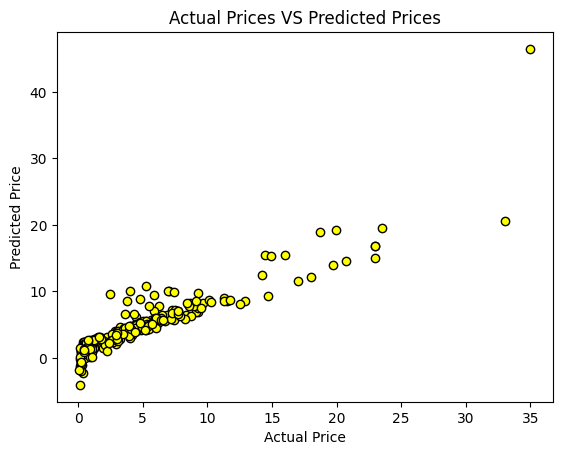

In [37]:
# Visualisation
plt.scatter(Y_train, training_data_prediction, edgecolors = 'black', color = 'yellow')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices VS Predicted Prices")
plt.show()

In [39]:
# Prediction on test data
test_data_prediction = lasso_regression.predict(X_test)

In [40]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.8709167941173195


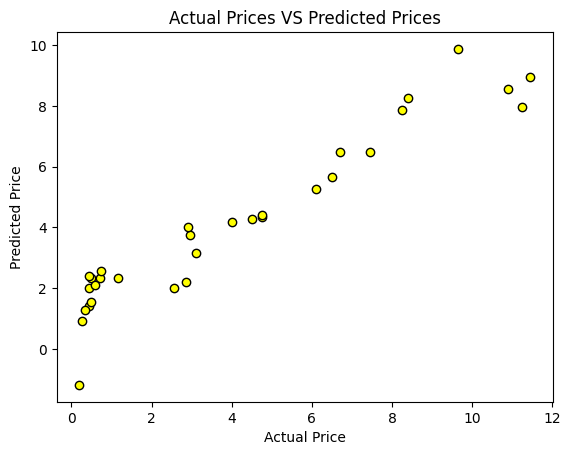

In [41]:
# Visualisation
plt.scatter(Y_test, test_data_prediction, edgecolors = 'black', color = 'yellow')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices VS Predicted Prices")
plt.show()